# Implemented Modules

All modules within this section have been personally implemented by the author using `NumPy` and `Matplotlib` libraries. You can find the source code on [GitHub](https://github.com/dylannalex/ML-Lab/tree/main/image_quantization/src).

## Documentation

**src.image**

* `Image`: Represents an image with attributes such as RGB matrix, RGB vector, shape, and title.

* `load_image(image_path: str) -> Image`: Loads an image from the given file path, converts it to RGB format, and returns an Image object.

* `rgb_vector_to_image(rgb_vector: np.ndarray, image_shape: tuple) -> Image`: Converts an RGB vector to an Image object with the specified shape.

* `display_images(*images: Image, figsize=(10, 5))`: Displays images using matplotlib.

* `plot_rgb_vector(rgb_vector: np.ndarray, figsize=(10, 5), title=None, alpha=0.6, s=4)`: Plots a 3D scatter plot of RGB vectors.

In [81]:
from src import image

**src.model**

* `KMeans`: Implements the $k$-means clustering algorithm with parameters for the number of clusters (`n_clusters`), tolerance (`tol`), maximum iterations (`max_iter`), and random state (`random_state`).

* `KMeans.fit(X: np.ndarray) -> KMeans`: Fits the KMeans model to the input data X using the specified parameters.

* `KMeans.labels_`: An array of shape `(n_samples,)` where each element represents the cluster index assigned to the corresponding sample.

* `KMeans.cluster_centers_`: An array of shape `(n_clusters, n_features)` representing the final cluster centers after fitting the model. Each row corresponds to the centroid of a cluster in the feature space.


In [82]:
from src import model

## Try it yourself

To try out these modules, simply follow these steps:

1. Download the source code [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/dylannalex/ML-Lab/tree/main/image_quantization)

2. Go to the */image_quantization* folder

3. Install required packages: `pip install -r requirements.txt`

4. Create a notebook or Python file in the */image_quantization* folder

5. You're all set! You can import the modules as `from src import image, model`

# Image Quantization

One of the applications of $k$-means is image quantization (specifically, color quantization), which consists in reducing the number of distinct colors used in an image, usually with the intention that the new image should be as visually similar as possible to the original image.

Let's explore this concept by applying the $k$-means algorithm to a sample image ([daisy image, by Bessi](https://pixabay.com/es/photos/margarita-flor-blanco-bloom-729510/)).

## Loading the Image

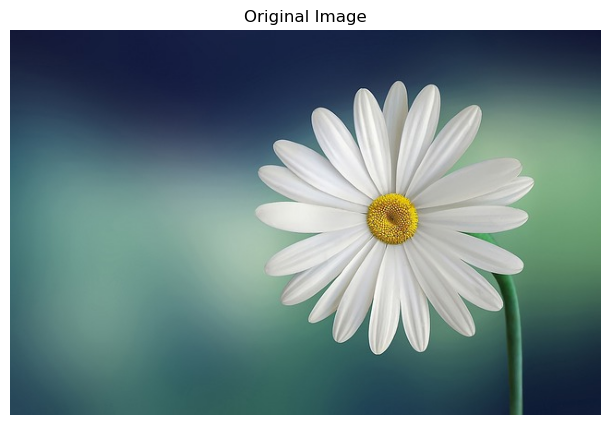

In [3]:
import numpy as np

img = image.load_image("img/flower.jpg")
img.title = "Original Image"
image.display_images(img)

The image is loaded as matrix $M \in \mathbb{R^{n \times m \times 3}}$ where $M_{ij}$ is the pixel from the row $i$ and column $j$:

In [4]:
img.rgb_matrix.shape

(417, 640, 3)

To fit the $k$-means algorithm, the image matrix $M$ has to be converted into a feature matrix $X \in \mathbb{R^{n \cdot m \times 3}}$ where $X_i$ represents the feature vector $x^{(i)}$:

In [5]:
img.rgb_vector.shape

(266880, 3)

We can visualize the feature vectors in the 3-dimensional space:

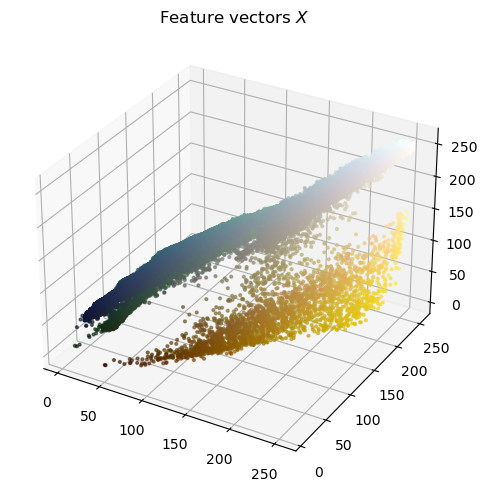

In [6]:
image.plot_rgb_vector(img.rgb_vector, title="Feature vectors $X$")

## Applying $k$-means

We will experiment with three different values for $k$: 8, 16 and 32. This means that we will aim to represent the entire spectrum of colors in the image using either 8, 16 or 32 distinct colors. The $k$-means algorithm will group similar colors together and assign them to the same cluster, effectively reducing the variety of colors present in the image.

### $8$-means

In [7]:
k8_means = model.KMeans(n_clusters=8, random_state=44)
%time k8_means.fit(img.rgb_vector)

CPU times: total: 10.9 s
Wall time: 11.1 s


In [8]:
k8_means.iterations

72

In [9]:
k8_means.labels_

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [10]:
k8_means.cluster_centers_

array([[ 42.39915168,  67.65893264,  84.11651684],
       [ 87.46747399, 127.68052914, 119.33007048],
       [191.76564391, 194.46557984, 189.38218125],
       [114.46671081, 156.33419082, 139.91508329],
       [ 60.50504249,  99.93731908, 100.45057895],
       [152.42347775, 174.89832302, 153.38496535],
       [ 24.28310161,  36.94729513,  65.34303884],
       [223.21554659, 224.39480287, 222.18355735]])

As we can observe, each centroid is a 3-dimensional floating-point array. Consequently, we need to cast this array to an integer array.

In [11]:
k8_colors = np.uint8(k8_means.cluster_centers_)
k8_colors

array([[ 42,  67,  84],
       [ 87, 127, 119],
       [191, 194, 189],
       [114, 156, 139],
       [ 60,  99, 100],
       [152, 174, 153],
       [ 24,  36,  65],
       [223, 224, 222]], dtype=uint8)

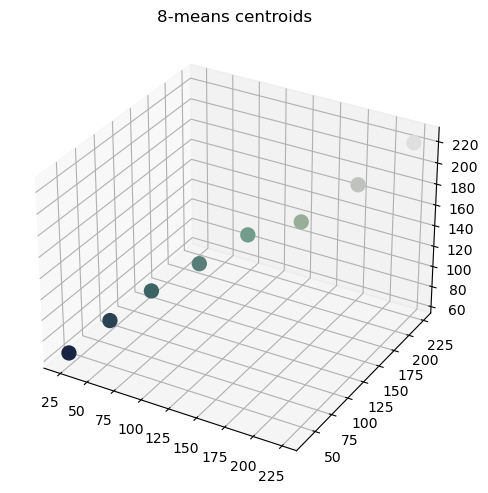

In [12]:
image.plot_rgb_vector(k8_colors, alpha=1, s=100, title="8-means centroids")

To obtain the quantized image, we simply replace each pixel's feature vector with the corresponding centroid of the cluster to which it belongs:

In [13]:
k8_rgb_vector = k8_colors[k8_means.labels_]

Finally, we can display the quantized image:

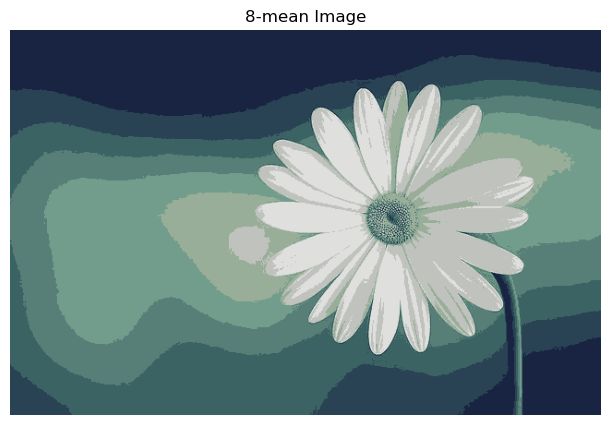

In [27]:
k8_image = image.rgb_vector_to_image(k8_rgb_vector, img.shape)
k8_image.title = "8-mean Image"
image.display_images(k8_image)

### $16$-means

In [15]:
k16_means = model.KMeans(n_clusters=16, random_state=44)
%time k16_means.fit(img.rgb_vector)

CPU times: total: 30.9 s
Wall time: 31.6 s


In [16]:
k16_means.iterations

100

In [17]:
k16_means.labels_

array([13, 13, 13, ..., 13, 13, 13], dtype=int64)

In [18]:
k16_colors = np.uint8(k16_means.cluster_centers_)
k16_colors

array([[ 36,  55,  77],
       [113, 155, 145],
       [ 81, 123, 117],
       [ 96, 137, 132],
       [229, 230, 228],
       [107, 155, 117],
       [190, 191, 187],
       [ 25,  38,  68],
       [ 54,  94,  95],
       [209, 210, 207],
       [173, 139,  38],
       [162, 181, 168],
       [134, 169, 147],
       [ 20,  30,  57],
       [ 67, 107, 107],
       [ 45,  73,  88]], dtype=uint8)

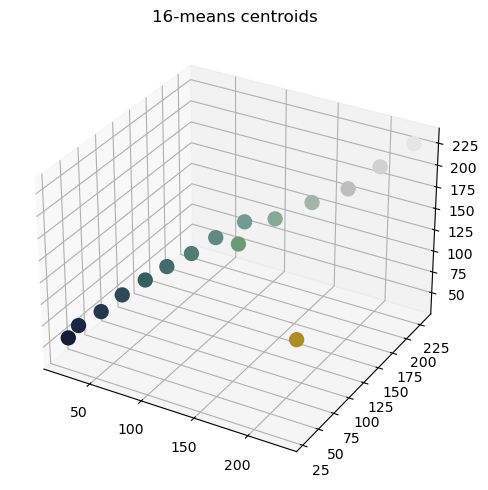

In [19]:
image.plot_rgb_vector(k16_colors, alpha=1, s=100, title="16-means centroids")

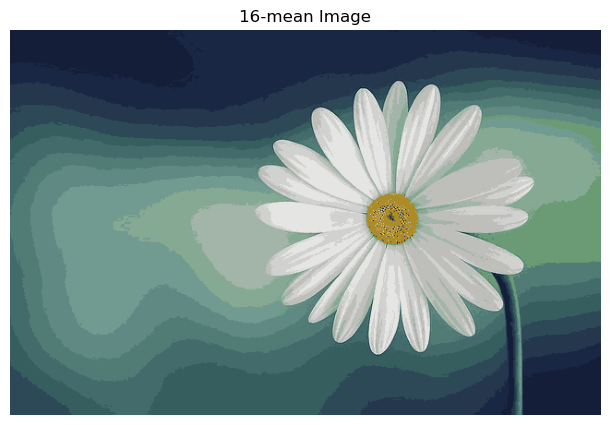

In [28]:
k16_rgb_vector = k16_colors[k16_means.labels_]
k16_image = image.rgb_vector_to_image(k16_rgb_vector, img.shape)
k16_image.title = "16-mean Image"
image.display_images(k16_image)

### $32$-means

In [21]:
k32_means = model.KMeans(n_clusters=32, random_state=44)
%time k32_means.fit(img.rgb_vector)

CPU times: total: 39 s
Wall time: 40.1 s


In [22]:
k32_means.iterations

76

In [23]:
k32_means.labels_

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

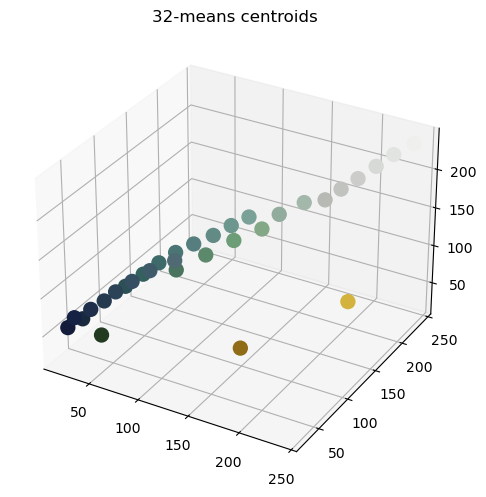

In [24]:
k32_colors = np.uint8(k32_means.cluster_centers_)
image.plot_rgb_vector(k32_colors, alpha=1, s=100, title="32-means centroids")

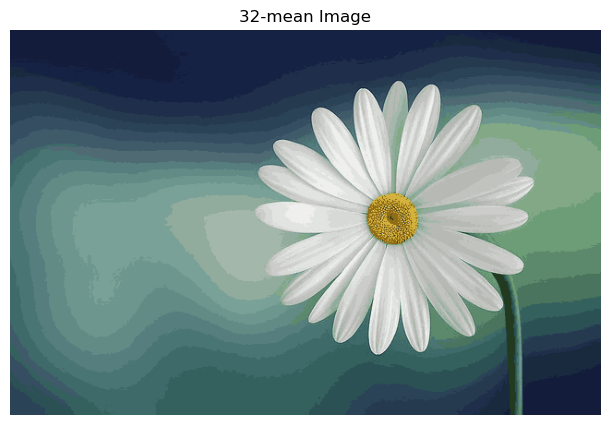

In [29]:
k32_rgb_vector = k32_colors[k32_means.labels_]
k32_image = image.rgb_vector_to_image(k32_rgb_vector, img.shape)
k32_image.title = "32-mean Image"
image.display_images(k32_image)

## Comparison

By comparing the results obtained with $k=8$, $k=16$ and $k=32$, we can observe how the choice of the number of centers influences the visual appearance of the image. A smaller value of $k$ may result in a more pronounced reduction in color variety, while a larger $k$ might preserve more intricate details in the color distribution. 

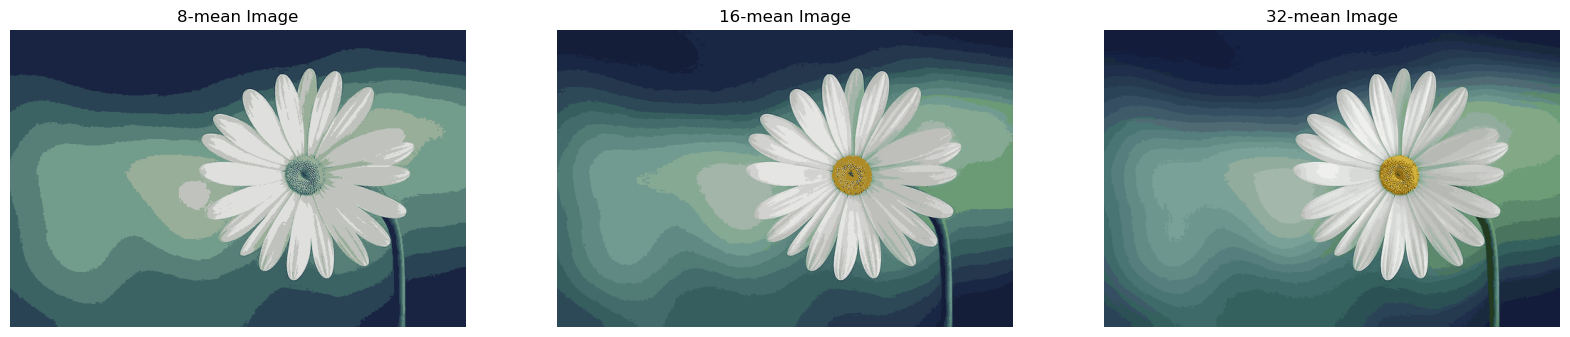

In [26]:
image.display_images(k8_image, k16_image, k32_image, figsize=(20, 15))

We can quantify the image quality with a clusters cost function, which measures the squared Euclidean distance between each feature vector $x^{(i)}$ and its representative (i.e., cluster centroid) $z_j$ from the cluster $C_j$.

$$
\text{cost}(z_1, \dots, z_k) = \sum_{j=1}^k \sum_{i \in C_j} ||x^{(i)} - z_j||^2
$$

In [78]:
def clusters_cost(X, centroids, labels):
    cost = 0
    for j in range(len(centroids)):
        cluster = X[np.where(labels == j)]
        distance = np.linalg.norm(cluster - centroids[j])**2
        cost += np.sum(distance)
    return cost

k8_cost = clusters_cost(img.rgb_vector, k8_means.cluster_centers_, k8_means.labels_)
k16_cost = clusters_cost(img.rgb_vector, k16_means.cluster_centers_, k16_means.labels_)
k32_cost = clusters_cost(img.rgb_vector, k32_means.cluster_centers_, k32_means.labels_)

We can visualize how the clusters cost decreases as $k$ increases: 

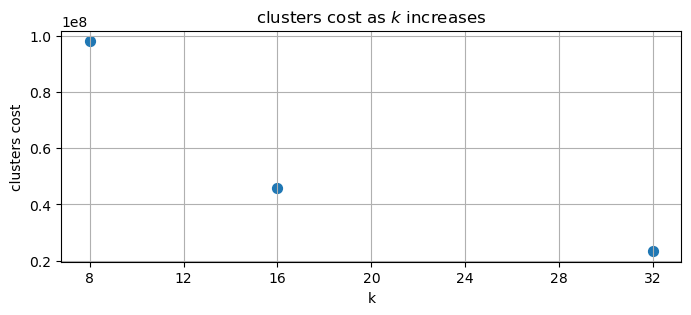

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 3))
ax.scatter((8, 16, 32), (k8_cost, k16_cost, k32_cost), s=50)
ax.set_title("clusters cost as $k$ increases")
ax.set_xlabel("k")
ax.set_ylabel("clusters cost")
ax.set_xticks([i for i in range(8, 33, 4)])

plt.grid()
plt.show()

It's worth noting that, in addition to the visual impact, the computational complexity of the algorithm increases with a larger value of $k$. Therefore, the choice of $k$ involves a trade-off between computational efficiency and the level of detail preserved in the color representation.